In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn import preprocessing

In [4]:
#loaded the data and took a breif view inside it!!
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#now checking for missing value and taking necessary steps
data.isna().sum()
data.dropna(axis=0, inplace=True)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
#performing feature selection and eda to the given data

#data copy created for further usage
original_df=pd.DataFrame(data)
#creating a copy of it
copyData=original_df.copy()


In [9]:
copyData.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
copyData.rename(columns={'male': 'sex_male'}, inplace=True) #changed the name of column
copyData.drop(['education'], inplace=True, axis=1) #dropped a column

copyData.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
copyData.columns.tolist()

['sex_male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [20]:
cat_col=copyData.select_dtypes(include=['object']).columns
num_col=copyData.select_dtypes(include=np.number).columns.tolist()
print("numerical columns")
print(num_col)
print("categoircal columns")
print(cat_col)

numerical columns
['sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
categoircal columns
Index([], dtype='object')


sex_male
Skew:  0.23


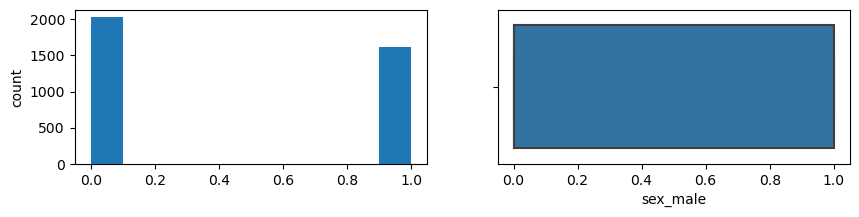

age
Skew:  0.23


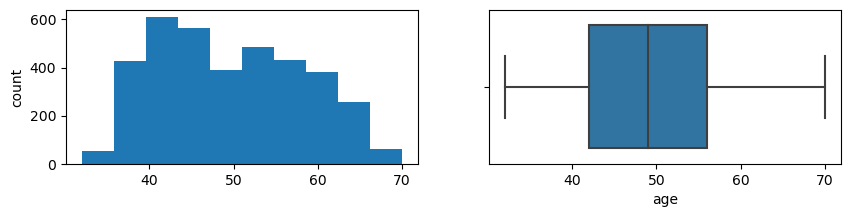

currentSmoker
Skew:  0.04


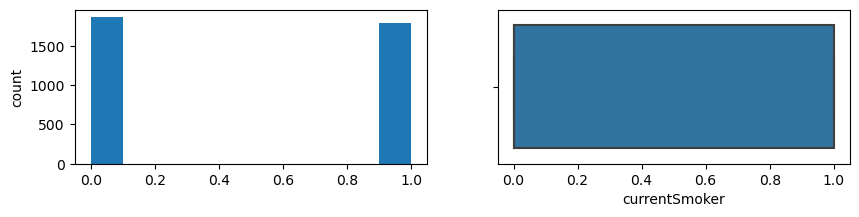

cigsPerDay
Skew:  1.23


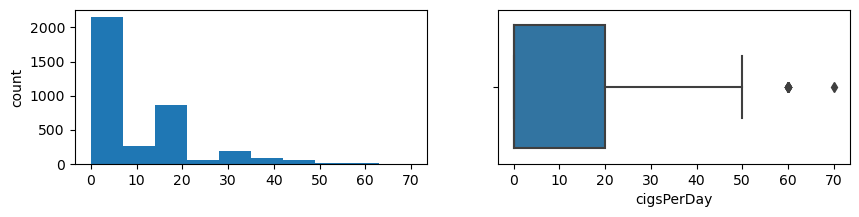

BPMeds
Skew:  5.48


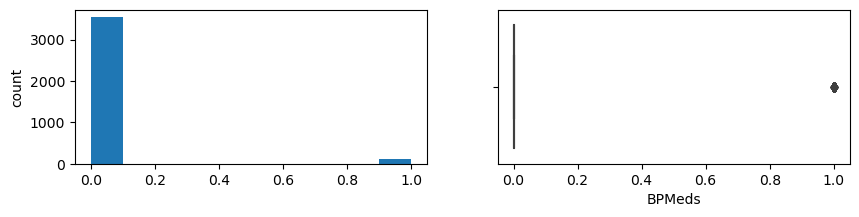

prevalentStroke
Skew:  13.09


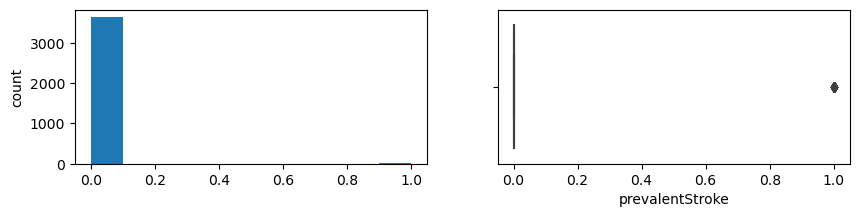

prevalentHyp
Skew:  0.81


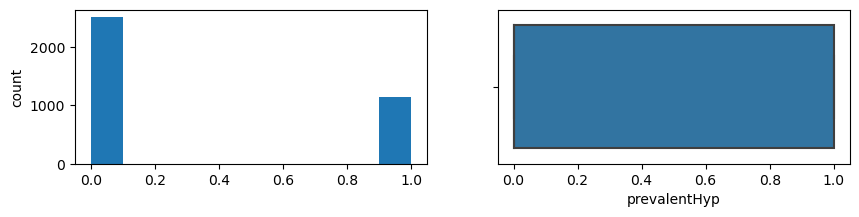

diabetes
Skew:  5.83


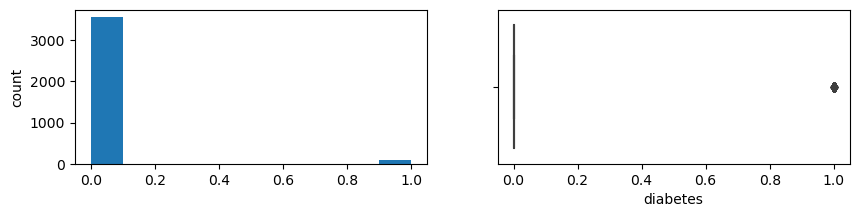

totChol
Skew:  0.66


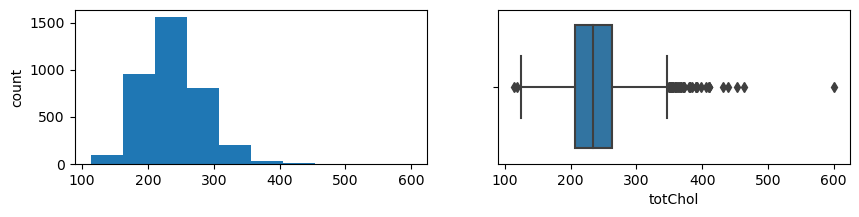

sysBP
Skew:  1.16


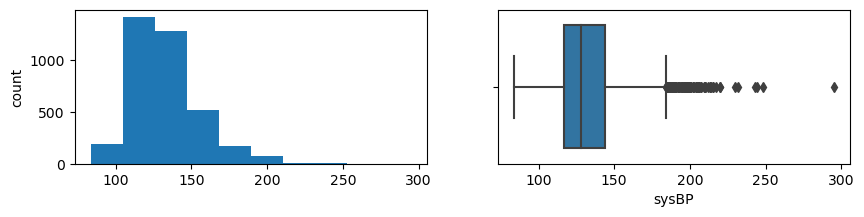

diaBP
Skew:  0.71


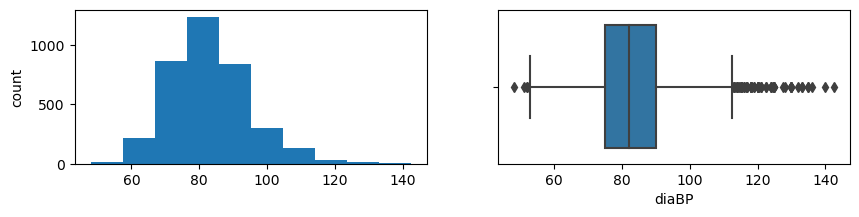

BMI
Skew:  1.0


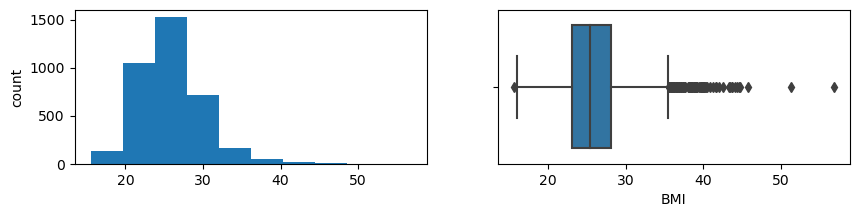

heartRate
Skew:  0.67


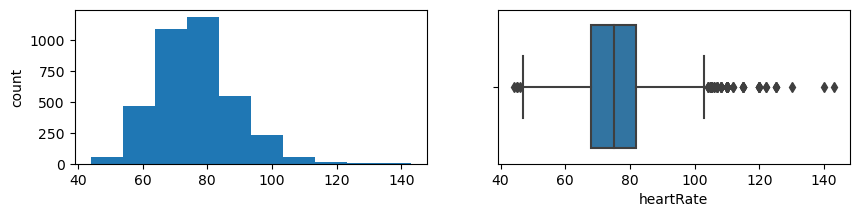

glucose
Skew:  6.28


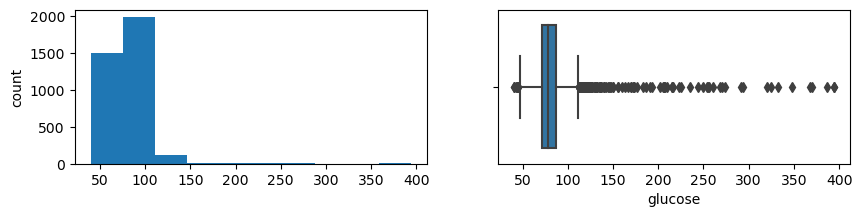

TenYearCHD
Skew:  1.94


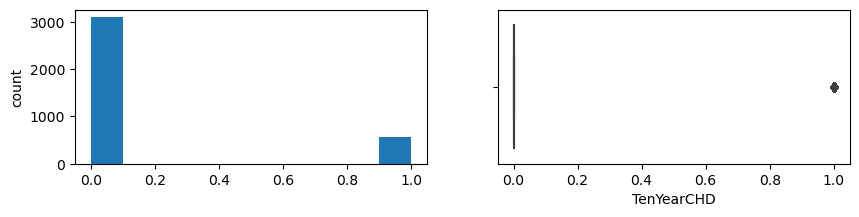

In [22]:
for col in num_col:
    print(col)
    print('Skew: ', round(copyData[col].skew(), 2))
    plt.figure(figsize = (10, 2))
    plt.subplot(1, 2, 1)
    copyData[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=copyData[col])
    plt.show()

In [25]:
#splitting the dataset into train, test
x=np.asarray(copyData[['age', 'sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y=np.asarray(copyData[['TenYearCHD']])

#normalisation of data
x=preprocessing.StandardScaler().fit(x).transform(x)

#train/test/split performing operaitons
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2926, 6) (2926, 1)
Test set: (732, 6) (732, 1)


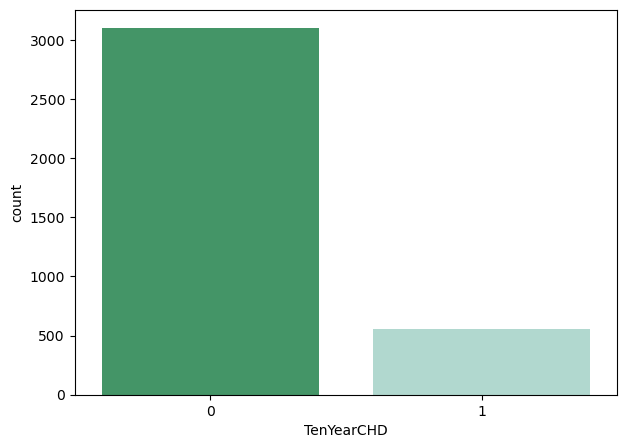

In [27]:
#performing some eda

plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=copyData, palette="BuGn_r")
plt.show()

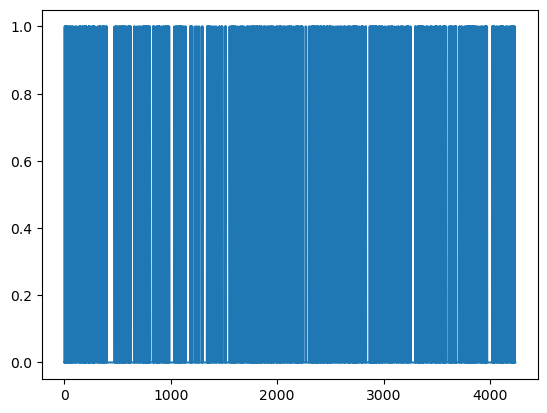

In [28]:
las=copyData['TenYearCHD'].plot()
plt.show(las)

In [30]:
#fiitng our logistic regression model

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)

C:\Users\Piyush\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#checking some metrics
from sklearn.metrics import accuracy_score
print("accuracy score for model is: ", accuracy_score(y_test, y_pred))

accuracy score for model is:  0.8346994535519126
